In [2]:
import os
import json
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
data_dir = "../../../../MCM1_Practicum_Data/"
meta_data_dir = data_dir+"Metadata/"
binned_data_dir=data_dir+"Pre-Processed_Data/data-ms-aggregates/"

lr_dir = data_dir+"Pre-Processed_Data/LR/"
feature_of_interest = "DF-ws"
feature_of_interest_folder = lr_dir+feature_of_interest+ "/"
models_folder = feature_of_interest_folder+"Models/"
evaluation_folder = feature_of_interest_folder+"Evaluation/"
test_data_folder = feature_of_interest_folder+"Test/"

In [4]:
evaluation_files = os.listdir(evaluation_folder)
train_evaluations_fns = [x for x in evaluation_files if str.__contains__(x, "train")]
test_evaluations_fns = [x for x in evaluation_files if str.__contains__(x, "test")]

train_evaluations = {}
for fn in train_evaluations_fns:
    ws = int(str.replace(fn[:1],"-",""))
    fp = evaluation_folder+fn
    with open(fp, "r") as f:
        ev_dict = json.load(f)
        ev_dict = {k:v["mean"] for k,v in ev_dict.items()}
    train_evaluations[ws] = ev_dict

train_evaluations_all = pd.DataFrame(train_evaluations).T
train_evaluations_all = train_evaluations_all.sort_index()
display(train_evaluations_all)

test_evaluations = {}
for fn in test_evaluations_fns:
    ws = int(str.replace(fn[:1],"-",""))
    fp = evaluation_folder+fn
    with open(fp, "r") as f:
        ev_dict = json.load(f)
    test_evaluations[int(ws)] = ev_dict['weighted avg']

test_evaluations = pd.DataFrame(test_evaluations).T
test_evaluations = test_evaluations.sort_index()
test_evaluations = test_evaluations.drop("support", axis=1)
display(test_evaluations)


,accuracy,f1_macro,fit_time,precision_macro,recall_macro,score_time
3,0.254095,0.224056,2.312490,0.235710,0.250444,0.022702
6,0.450286,0.434599,2.244127,0.470849,0.450033,0.016517
9,0.603341,0.575058,3.310611,0.613132,0.593722,0.006914


,f1-score,precision,recall
3,0.176015,0.224807,0.194667
6,0.470223,0.500714,0.466667
9,0.616097,0.638798,0.617143


In [5]:
train_evaluations = train_evaluations_all[["accuracy", "f1_macro", "precision_macro", "recall_macro"]]
train_evaluations.columns = ["accuracy", "f1-score", "precision", "recall"]
train_evaluations = train_evaluations
#TODO get model accuracies

<Axes: >

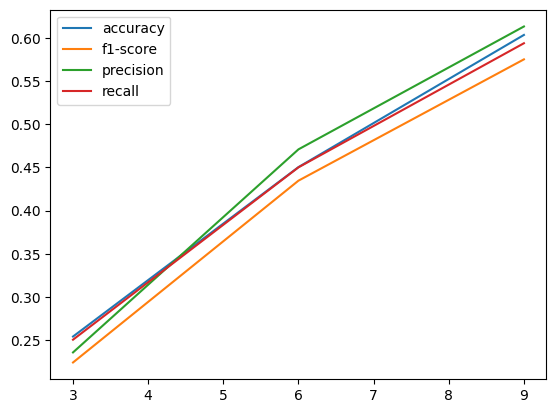

In [6]:
train_evaluations.plot()

<Axes: >

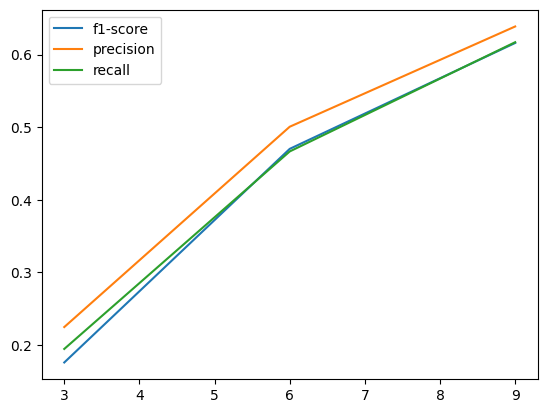

In [7]:
# Here Recall = Accuracy
test_evaluations.plot()

In [10]:
# 3. select best widening window
# 4. calculate sliding window accuracy
# 5. create open world model with an extra class of 50 random samples, test out with a set with a larger sample of unknowns
# 6. inspect autocorrelation


